# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

In [3]:
employee.head(15)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
# your answer here-1st way no pivot tables
employee.groupby('Department')['Salary'].mean() # group by department, look at salary column and compute the mean

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [5]:
# your answer here-2nd way
employee.pivot_table(index = 'Department', values = 'Salary') # default aggfunc is mean, so I don't have to include it

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [6]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = 'Salary') # pass a list of col names as the index

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [7]:
employee.pivot_table(index = ['Title', 'Department'], values = 'Salary') # also works

Salary
Title     Department        
VP        HR            70.0
          IT            70.0
analyst   HR            32.5
          IT            32.5
associate IT            60.0
          Sales         55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
employee.pivot_table(index = 'Title', columns = 'Years', values = 'Salary') # added columns = 'Years'

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [9]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = [np.mean, 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [10]:
# your answer here
# employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = ['median', 'minimum', 'maximum', np.std])

employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = ['median', 'min', 'max', np.std])

# I have Null values for the Standard Deviation for VP of HR, VP of IT, and associate of IT.
# this makes sense, since those dept-title combinations only had one person, and std dev is list length -1, meaning it would divide by zero at those points

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [46]:
# your answer here
# use fill_value = 0, to replace the NaN values with zero. since there is only one person, there IS NO std.dev, so zero would be accurate
# Why isn't this working? https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = ['median', 'min', 'max', np.std], fill_value = 0)
employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = ['median', 'min', 'max', np.std], fill_value = 0).fillna(0)
# this one works instead. the method of fillna() takes an argument to add it in. Since there is no std for a sample size of one, use Zero.

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

In [12]:
my_pivot = pd.pivot_table(employee, index = ['Department', 'Title'], values = 'Salary', aggfunc = ['median', 'min', 'max', np.std], fill_value = 0)
my_pivot

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [13]:
# your answer here

#  first confirm that there's no null values for Salary, so i know that if i Count the salary i'll be good
print(employee.Salary.isna().sum()) # returns zero, so all set! 

employee.pivot_table(index = 'Department', values = 'Salary', aggfunc = ['count', 'sum'])

0


,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [14]:
# your answer here

# you can set aggfunc equal to a dictionary where key = column and value = the desired function

employee.pivot_table(index = ['Department', 'Title'], values = ['Years', 'Salary'], aggfunc = {'Years' : 'sum', 'Salary' : np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [15]:
# your answer here--Your custom function here
def removeMax(x):
    return x.sort_values(ascending=False)[1:].mean() #for the Series, sort it in descending order, slice out the first row (which would be the maximum value), take the mean of that list, and return it

In [16]:
# your answer here
employee.pivot_table(index = 'Department', values = 'Salary', aggfunc = removeMax)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [17]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [18]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [19]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [21]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x = fitbit['Minutes Very Active'], y = fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [22]:
# your comment here
# resource: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

# With an r-value of 0.57, we can say there is a moderate positive relationship between Minutes Very Active and Steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

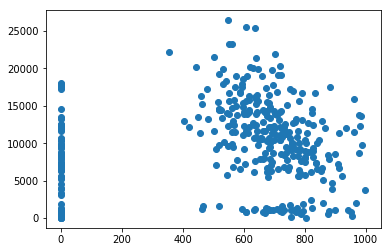

In [24]:
# your answer here
plt.scatter(x = fitbit['Minutes Sedentary'], y = fitbit.Steps)

In [25]:
# Your comment here
# With an r-value of less than 0.1, We can say there appears to be no correlation between Minutes Sedentary and Steps

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [26]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

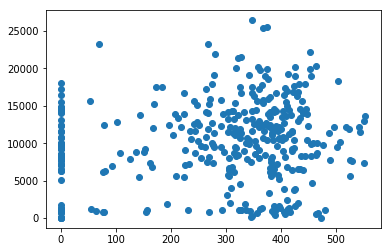

In [27]:
# your answer here
plt.scatter(x = fitbit['MinutesOfSleep'], y = fitbit['Steps'])

In [28]:
#With an r-value of 0.131, there is an extremely weak positive linear relationship between the Minutes of Sleep and the number of Steps

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [29]:
# your answer here
cor_fit = fitbit[
    ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
].corr()


In [30]:
#Print cor_fit
print(cor_fit.sort_values(by='Steps', ascending = False))

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Steps                      0.255305  1.000000  0.306511           0.076906   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
Floors                     0.130757  0.306511  1.000000           0.057812   
Calorie burned             1.000000  0.255305  0.130757           0.125353   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   

                     Minutes Very Active  MinutesOfSleep  
Steps                           0.571452        0.130986  
Minutes Very Active             1.000000        0.108018  
Floors                          0.399503        0.069464  
Calorie burned                  0.197881        0.011485  
MinutesOfSleep                  0.108018        1.000000  
Minutes Sedentary               0.105963        0.204242  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [31]:
# your answer here
# ['Minutes Very Active'] is the highest, with a correlation of 0.57

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [32]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [33]:
#Print time_grades
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

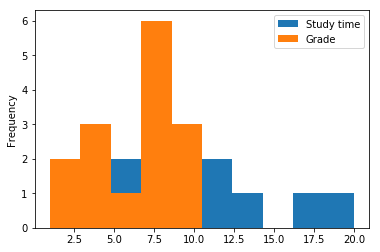

In [34]:
# your answer here
time_grades.plot(kind = 'hist')

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [35]:
# your answer here-Pearson
time_grades.corr() # with a Pearson r-value of ~0.8, there is a strong positive correlation between Study Time and Grade

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [36]:
## your answer here-Spearman
time_grades.corr(method = 'spearman') # with a Spearman r-value of ~0.82, there is a strong positive correlation between Study Time and Grade

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

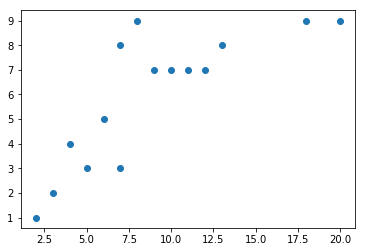

In [37]:
# your answer here
plt.scatter(x = time_grades['Study time'], y = time_grades.Grade)

In [38]:
#your comment here
# There is a strong positive linear correlation between these two variables.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [39]:
#your comment here
'''
Pearson is a measure of LINEAR correlation, while Spearman is a measure of RANK correlation. 
While x and y may not be very strongly correlated (only 0.75), the Spearman coefficient
can be close to 1 if both x and y increase or decrease together in the same direction.
consider the following x/y coordinates
(0, 1), (10, 100), (101, 500), (102, 2000)
x = 0, 10, 101, 102
y = 1, 100, 500, 2000
These are not a straight line, their Linear Correlation (Pearson) is not very strong, but
they each increase together. There is no point at which X increases and Y has not. 
Therefore the Rank Correlation (Spearman) is very strong.
'''

'\nPearson is a measure of LINEAR correlation, while Spearman is a measure of RANK correlation. \nWhile x and y may not be very strongly correlated (only 0.75), the Spearman coefficient\ncan be close to 1 if both x and y increase or decrease together in the same direction.\nconsider the following x/y coordinates\n(0, 1), (10, 100), (101, 500), (102, 2000)\nx = 0, 10, 101, 102\ny = 1, 100, 500, 2000\nThese are not a straight line, their Linear Correlation (Pearson) is not very strong, but\nthey each increase together. There is no point at which X increases and Y has not. \nTherefore the Rank Correlation (Spearman) is very strong.\n'

In [40]:
corr_example = pd.DataFrame({
    'x' : [0, 10, 101, 102],
    'y' : [1, 100, 500, 2000]
})

In [41]:
corr_example.corr(method = 'pearson') # shows a linear correlation of 0.75

,x,y
x,1.000000,0.754424
y,0.754424,1.000000


In [42]:
corr_example.corr(method = 'spearman') # shows a rank correlation of 1

,x,y
x,1.0,1.0
y,1.0,1.0
